In [1]:
import sys
import os
import numpy
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
sys.path.append('../')
from classifier.DNN import DNNMutliclass16S
from utility.file_utility import FileUtility

# Example of using deep learning for Crohns disease

In [2]:
# k-mer data
X=FileUtility.load_sparse_csr('../../Crohns_disease_prediction/datasets/dataset_6-mers_rate_complete1359_seq_5000.npz').toarray()
# labels
Y=FileUtility.load_list('../data_config/crohns-disease/k-mer_representations_labels/labels_disease_complete1359.txt')

In [3]:

# creating the deep NN architecture
# We use the Multi-Layer-Perceptrons (MLP) Neural Network architecture 
# with several hidden layers using Rectified Linear Unit (ReLU) as the nonlinear activation function.
# We use softmax activation function at the last layer to produce the probability vector that can be 
# regarded as representing posterior probabilities~\cite{Goodfellow-et-al-2016}. To avoid overfitting
# we perform early stopping and also use dropout  (weights less than one are dropouts in model_arch 
# and the rest the sizes of the hidden layers)

DNN=DNNMutliclass16S(X,Y,model_arch=[1024,0.2,512,0.2,256,0.1,128,8])
DNN.cross_validation('../../Crohns_disease_prediction/results/classifier/', gpu_dev='1', n_fold=10, epochs=100, batch_size=1000, model_strct='mlp')



 Evaluation on a new fold is now get started ..
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

 Evaluation on a new fold is now get started ..

 Evaluation on a new fold is now get started ..

 Evaluation on a new fold is now get started ..

 Evaluation on a new fold is now get started ..

 Evaluation on a new fold is now get started ..

 Evaluation on a new fold is now get started ..

 Evaluation on a new fold is now get started ..

 Evaluation on a new fold is now get started ..

 Evaluation on a new fold is now get started ..
0.69 $\pm$ 0.04 & 0.69 $\pm$ 0.04 & 0.69 $\pm$ 0.04 & 0.7 $\pm$ 0.04 & 0.7 $\pm$ 0.04 & 0.69 $\pm$ 0.04


# Error on train and test sets

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Loss with respect to the number of epochs for train and test sets')

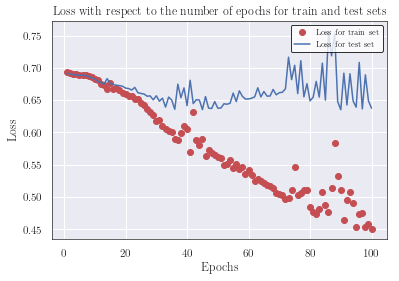

In [7]:
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline 
from utility.visualization_utility import create_mat_plot

[latex_line, p_micro, r_micro, f1_micro, p_macro, r_macro, f1_macro, history]=FileUtility.load_obj('../../Crohns_disease_prediction/results/classifier/results_mlp_1024-0.2-512-0.2-256-0.1-128-8_0.69.pickle')
(loss_values, val_loss_values, epochs)=history
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams["axes.edgecolor"] = "black"
matplotlib.rcParams["axes.linewidth"] = 0.6
plt.rc('text', usetex=True)
plt.plot(epochs, loss_values, 'ro', label='Loss for train set')
plt.plot(epochs, val_loss_values, 'b', label='Loss for test set')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc=1, prop={'size': 8},ncol=1, edgecolor='black', facecolor='white', frameon=True)
plt.title('Loss with respect to the number of epochs for train and test sets')

# Producing the activation function of the last layer

In [9]:
#X_new=DNNMutliclass16S.make_activation_function('../../Crohns_disease_prediction/results/classifier/nn_layers_mlp_1024-0.2-512-0.2-256-0.1-128-8_0.67.pickle',X)
X_new=DNNMutliclass16S.make_activation_function('../../Crohns_disease_prediction/results/classifier/weights_layers_mlp_1024-0.2-512-0.2-256-0.1-128-8_0.69.pickle',X)

In [10]:
X_new.shape

(1359, 8)

## Oral bacteria

In [ ]:
# Code for classification of oral bacteria data